# Init

In [1]:
from model import RNN, CNN, BiGRU, LSTMAttn
from utils import train, load_pickle, save_pickle
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from data_loader import DataLoad

sent_length = 30
batch_size = 20
output_size = 5
hidden_dim = 512
num_layers = 2
dropout = 0.3
lr = 5e-5
epochs = 200
clip = 10 # gradient clipping
pretrained_vocab = "glove.6B.300d"

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dataset = DataLoad(sent_length=sent_length, pretrained_vocab=pretrained_vocab, batch_size=batch_size)

emb_size = dataset.TEXT.vocab.vectors.size()[0]
embedding_dim = dataset.TEXT.vocab.vectors.size()[1]
pretrained_emb = dataset.TEXT.vocab.vectors

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Train - RNN

In [2]:
model = RNN(emb_size=emb_size, 
            emb_dimension=embedding_dim,
            pretrained_emb=dataset.TEXT.vocab.vectors,
            output_size=output_size,
            num_layers=num_layers,
            hidden_size=hidden_dim,
            dropout=dropout,
            bidirectional=True)

model.to(DEVICE)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_history, acc_history , val_acc_history, test_acc_history = train(epochs, batch_size, dataset.train_iter, dataset.val_iter, dataset.test_iter, criterion, optimizer, model, clip)


RNN(
  (embedding): Embedding(18280, 300)
  (dropout_train): Dropout(p=0.3, inplace=False)
  (dropout_test): Dropout(p=0.0, inplace=False)
  (rnn): RNN(300, 256, num_layers=2, bidirectional=True)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=5, bias=True)
)
Epoch: 1/30 	 Loss: 1.56094 	 Acc: 0.28541 	 Val_acc: 0.35545 	 Test_acc: 0.35591
Epoch: 2/30 	 Loss: 1.41833 	 Acc: 0.37506 	 Val_acc: 0.36273 	 Test_acc: 0.37273
Epoch: 3/30 	 Loss: 1.36329 	 Acc: 0.40035 	 Val_acc: 0.37545 	 Test_acc: 0.39227
Epoch: 4/30 	 Loss: 1.33207 	 Acc: 0.41635 	 Val_acc: 0.39727 	 Test_acc: 0.37682
Epoch: 5/30 	 Loss: 1.31350 	 Acc: 0.42894 	 Val_acc: 0.39545 	 Test_acc: 0.40409
Epoch: 6/30 	 Loss: 1.29533 	 Acc: 0.43847 	 Val_acc: 0.36909 	 Test_acc: 0.37955
Epoch: 7/30 	 Loss: 1.27383 	 Acc: 0.44506 	 Val_acc: 0.37818 	 Test_acc: 0.39500
Epoch: 8/30 	 Loss: 1.25634 	 Acc: 0.45541 

## save and visualize

In [3]:
print("Best train accuracy: {:5f}".format(max(acc_history)))
print("Best val accuracy: {:5f}".format(max(val_acc_history)))
print("Best test accuracy: {:5f}".format(max(test_acc_history)))

save_pickle("loss_RNN.pkl", loss_history)
save_pickle("acc_RNN.pkl", acc_history)
save_pickle("val_acc_RNN.pkl", val_acc_history)
save_pickle("test_acc_RNN.pkl", test_acc_history)

Best train accuracy: 0.796000
Best val accuracy: 0.397273
Best test accuracy: 0.405000


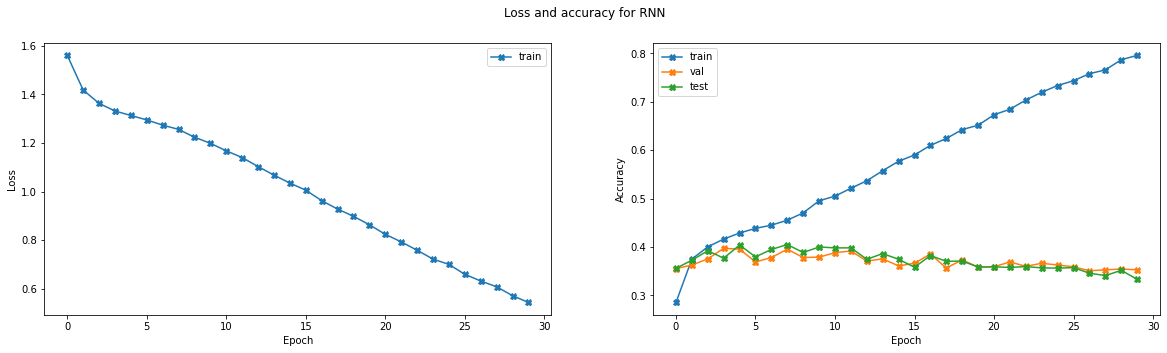

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(load_pickle('/content/loss_RNN.pkl'), marker="X")
plt.legend(['train'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(load_pickle('/content/acc_RNN.pkl'), marker="X")
plt.plot(load_pickle('/content/val_acc_RNN.pkl'), marker="X")
plt.plot(load_pickle('/content/test_acc_RNN.pkl'), marker="X")
plt.legend(['train', 'val', 'test'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.suptitle('Loss and accuracy for RNN')
plt.show()

# Train - CNN

In [5]:
model = CNN(emb_size=emb_size,
            emb_dimension=embedding_dim,
            pretrained_emb=pretrained_emb,
            output_size=output_size,
            dropout=dropout)

model.to(DEVICE)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_history, acc_history , val_acc_history, test_acc_history = train(epochs, batch_size, dataset.train_iter, dataset.val_iter, dataset.test_iter, criterion, optimizer, model, clip)


CNN(
  (embedding): Embedding(18280, 300)
  (dropout_train): Dropout(p=0.3, inplace=False)
  (dropout_test): Dropout(p=0.0, inplace=False)
  (conv1): Conv2d(1, 100, kernel_size=(3, 300), stride=(1, 1))
  (conv2): Conv2d(1, 100, kernel_size=(4, 300), stride=(1, 1))
  (conv3): Conv2d(1, 100, kernel_size=(5, 300), stride=(1, 1))
  (fc): Linear(in_features=300, out_features=5, bias=True)
)
Epoch: 1/30 	 Loss: 1.54983 	 Acc: 0.30847 	 Val_acc: 0.31182 	 Test_acc: 0.30682
Epoch: 2/30 	 Loss: 1.47359 	 Acc: 0.37294 	 Val_acc: 0.35727 	 Test_acc: 0.36591
Epoch: 3/30 	 Loss: 1.40426 	 Acc: 0.42071 	 Val_acc: 0.37091 	 Test_acc: 0.37455
Epoch: 4/30 	 Loss: 1.34322 	 Acc: 0.44706 	 Val_acc: 0.38091 	 Test_acc: 0.38273
Epoch: 5/30 	 Loss: 1.28820 	 Acc: 0.47682 	 Val_acc: 0.38818 	 Test_acc: 0.39364
Epoch: 6/30 	 Loss: 1.24874 	 Acc: 0.49129 	 Val_acc: 0.41818 	 Test_acc: 0.41818
Epoch: 7/30 	 Loss: 1.20979 	 Acc: 0.51494 	 Val_acc: 0.41909 	 Test_acc: 0.42136
Epoch: 8/30 	 Loss: 1.17287 	 Acc: 0.

## save and visualize

In [6]:
print("Best train accuracy: {:5f}".format(max(acc_history)))
print("Best val accuracy: {:5f}".format(max(val_acc_history)))
print("Best test accuracy: {:5f}".format(max(test_acc_history)))

save_pickle("loss_CNN.pkl", loss_history)
save_pickle("acc_CNN.pkl", acc_history)
save_pickle("val_acc_CNN.pkl", val_acc_history)
save_pickle("test_acc_CNN.pkl", test_acc_history)

Best train accuracy: 0.870235
Best val accuracy: 0.435455
Best test accuracy: 0.446818


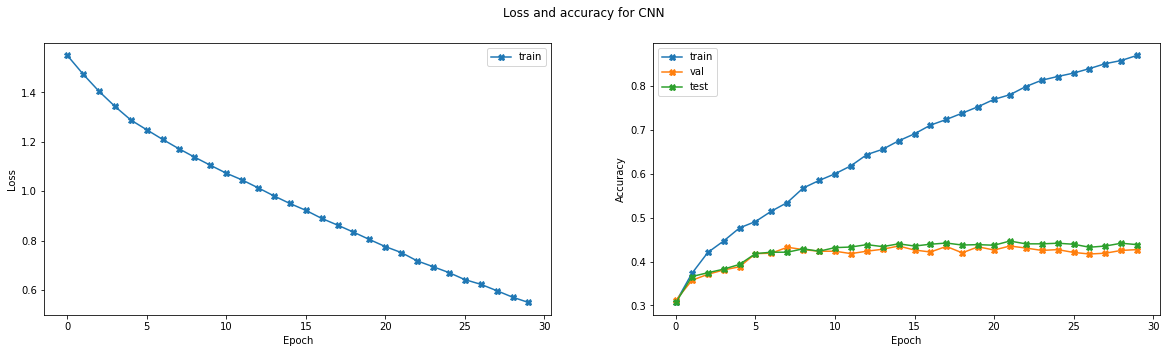

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(load_pickle('/content/loss_CNN.pkl'), marker="X")
plt.legend(['train'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(load_pickle('/content/acc_CNN.pkl'), marker="X")
plt.plot(load_pickle('/content/val_acc_CNN.pkl'), marker="X")
plt.plot(load_pickle('/content/test_acc_CNN.pkl'), marker="X")
plt.legend(['train', 'val', 'test'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.suptitle('Loss and accuracy for CNN')
plt.show()

# Train - LSTMAttn

In [8]:
model = LSTMAttn(emb_size=emb_size, 
            emb_dimension=embedding_dim,
            pretrained_emb=dataset.TEXT.vocab.vectors,
            output_size=output_size,
            hidden_size=hidden_dim,
            dropout=dropout)

model.to(DEVICE)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_history, acc_history , val_acc_history, test_acc_history = train(epochs, batch_size, dataset.train_iter, dataset.val_iter, dataset.test_iter, criterion, optimizer, model, clip)


LSTMAttn(
  (embedding): Embedding(18280, 300)
  (dropout_train): Dropout(p=0.3, inplace=False)
  (dropout_test): Dropout(p=0.0, inplace=False)
  (lstm): LSTM(300, 256)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)
Epoch: 1/30 	 Loss: 1.56589 	 Acc: 0.29518 	 Val_acc: 0.29636 	 Test_acc: 0.28773
Epoch: 2/30 	 Loss: 1.44639 	 Acc: 0.37165 	 Val_acc: 0.38091 	 Test_acc: 0.38682
Epoch: 3/30 	 Loss: 1.36934 	 Acc: 0.39353 	 Val_acc: 0.39636 	 Test_acc: 0.40227
Epoch: 4/30 	 Loss: 1.33182 	 Acc: 0.41094 	 Val_acc: 0.38636 	 Test_acc: 0.38909
Epoch: 5/30 	 Loss: 1.31740 	 Acc: 0.41576 	 Val_acc: 0.39000 	 Test_acc: 0.40136
Epoch: 6/30 	 Loss: 1.30477 	 Acc: 0.41953 	 Val_acc: 0.39091 	 Test_acc: 0.40773
Epoch: 7/30 	 Loss: 1.29332 	 Acc: 0.42918 	 Val_acc: 0.39364 	 Test_acc: 0.40318
Epoch: 8/30 	 Loss: 1.28064 	 Acc: 0.43176 	 Val_acc: 0.38818 	 Test_acc: 0.39727
Epoch: 9/30 	 Loss: 1.26648 	 Acc: 0.44176 	 Val_acc: 0.39273 	 Test_acc: 0.39818
Epoch: 10/30 	 Loss: 1.25608 	 A

## save and visualize

In [9]:
print("Best train accuracy: {:5f}".format(max(acc_history)))
print("Best val accuracy: {:5f}".format(max(val_acc_history)))
print("Best test accuracy: {:5f}".format(max(test_acc_history)))

save_pickle("loss_GRU.pkl", loss_history)
save_pickle("acc_GRU.pkl", acc_history)
save_pickle("val_acc_GRU.pkl", val_acc_history)
save_pickle("test_acc_GRU.pkl", test_acc_history)

Best train accuracy: 0.550941
Best val accuracy: 0.430000
Best test accuracy: 0.440909


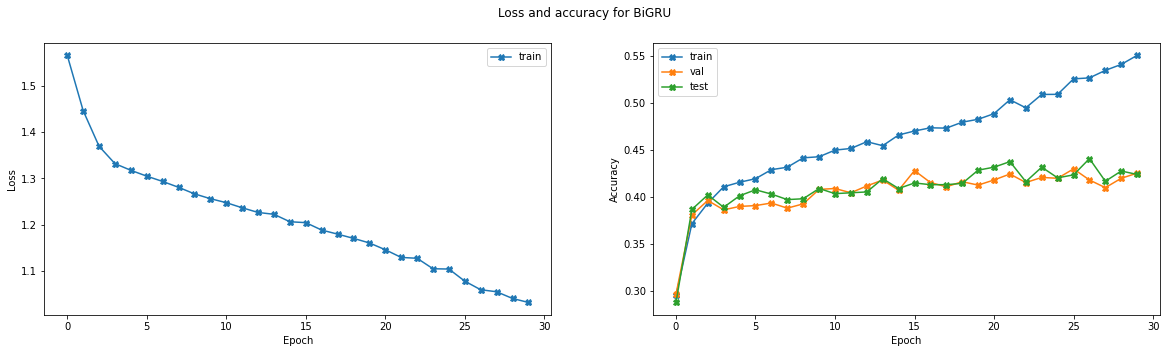

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(load_pickle('/content/loss_GRU.pkl'), marker="X")
plt.legend(['train'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(load_pickle('/content/acc_GRU.pkl'), marker="X")
plt.plot(load_pickle('/content/val_acc_GRU.pkl'), marker="X")
plt.plot(load_pickle('/content/test_acc_GRU.pkl'), marker="X")
plt.legend(['train', 'val', 'test'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.suptitle('Loss and accuracy for BiGRU')
plt.show()

# Train - BiGRU

In [11]:
model = BiGRU(emb_size=emb_size,
            emb_dimension=embedding_dim,
            pretrained_emb=pretrained_emb,
            output_size=output_size,
            dropout=dropout,
            bidirectional=True,
            spatial_dropout=True)

model.to(DEVICE)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_history, acc_history , val_acc_history, test_acc_history = train(epochs, batch_size, dataset.train_iter, dataset.val_iter, dataset.test_iter, criterion, optimizer, model, clip)


BiGRU(
  (embedding): Embedding(18280, 300)
  (dropout_train): Dropout(p=0.3, inplace=False)
  (dropout_test): Dropout(p=0.0, inplace=False)
  (spatial_dropout1d): Dropout2d(p=0.3, inplace=False)
  (gru): GRU(300, 256, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (linear): Linear(in_features=768, out_features=5, bias=True)
)
Epoch: 1/30 	 Loss: 1.54867 	 Acc: 0.30082 	 Val_acc: 0.34909 	 Test_acc: 0.34318
Epoch: 2/30 	 Loss: 1.42801 	 Acc: 0.37106 	 Val_acc: 0.40364 	 Test_acc: 0.39545
Epoch: 3/30 	 Loss: 1.36276 	 Acc: 0.40271 	 Val_acc: 0.40364 	 Test_acc: 0.40273
Epoch: 4/30 	 Loss: 1.34802 	 Acc: 0.41259 	 Val_acc: 0.38818 	 Test_acc: 0.38500
Epoch: 5/30 	 Loss: 1.32561 	 Acc: 0.42118 	 Val_acc: 0.40545 	 Test_acc: 0.40818
Epoch: 6/30 	 Loss: 1.31855 	 Acc: 0.42376 	 Val_acc: 0.39545 	 Test_acc: 0.41273
Epoch: 7/30 	 Loss: 1.29692 	 Acc: 0.42976 	 Val_acc: 0.41636 	 Test_acc: 0.41682
Epoch: 8/30 	 Loss: 1.28125 	 Acc: 0.44353 	 Val_acc: 0.42091 	 Test_acc: 0.4

## save and visualize

In [12]:
print("Best train accuracy: {:5f}".format(max(acc_history)))
print("Best val accuracy: {:5f}".format(max(val_acc_history)))
print("Best test accuracy: {:5f}".format(max(test_acc_history)))

save_pickle("loss_GRU.pkl", loss_history)
save_pickle("acc_GRU.pkl", acc_history)
save_pickle("val_acc_GRU.pkl", val_acc_history)
save_pickle("test_acc_GRU.pkl", test_acc_history)

Best train accuracy: 0.571176
Best val accuracy: 0.453636
Best test accuracy: 0.455909


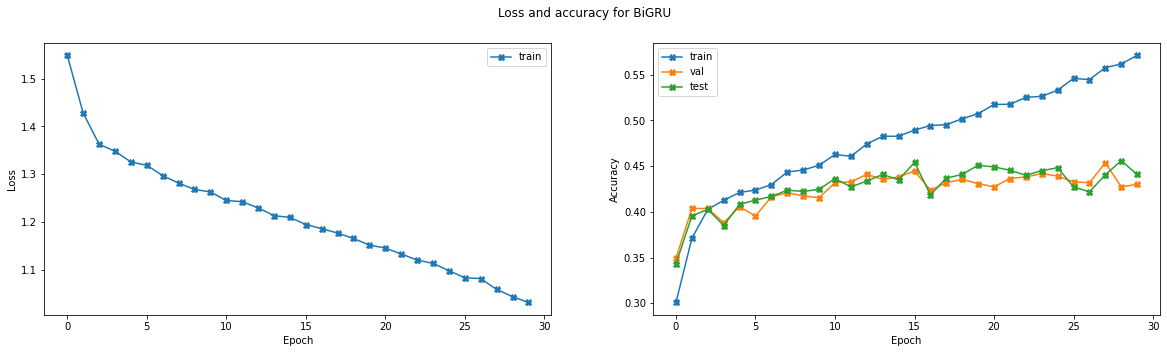

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(load_pickle('/content/loss_GRU.pkl'), marker="X")
plt.legend(['train'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(load_pickle('/content/acc_GRU.pkl'), marker="X")
plt.plot(load_pickle('/content/val_acc_GRU.pkl'), marker="X")
plt.plot(load_pickle('/content/test_acc_GRU.pkl'), marker="X")
plt.legend(['train', 'val', 'test'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.suptitle('Loss and accuracy for BiGRU')
plt.show()